In [1]:
from classifier import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get training data and labels
train_data, label_data = get_train_data('train.txt')

# Number of data points to use for training 
num_train = train_data.shape[2]

# Batch size for each epoch 
batch_size = train_data.shape[2]

# Create dataset and dataloader
reshaped_train = []
reshaped_label = []
for i in range(num_train):
    reshaped_train.append(train_data[:, :, i])
    reshaped_label.append(label_data[i, :])
datatrain_tensor = torch.FloatTensor(reshaped_train)
labeltrain_tensor = torch.FloatTensor(reshaped_label)
train_dataset = dataset(datatrain_tensor, labeltrain_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Training the model...
Starting epoch 0
Starting epoch 10000
Starting epoch 20000
Training complete!


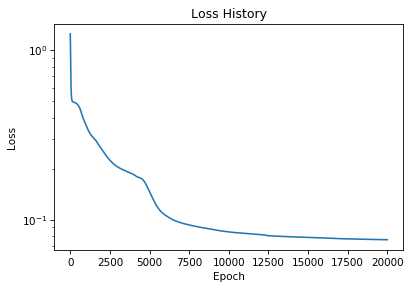

In [3]:
# Number of training epochs to use 
num_epochs = 20001

# Learning rate of the model
learning_rate = 1e-3

# Mean-squared error loss
criterion = nn.MSELoss()

# Use gpu if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create a model from  autoencoder class and load to device
model = text_classifier(train_data.shape[0], train_data.shape[1]).to(device) 

# Adam optimizer object
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_history = []
print('Training the model...')
for epoch in range(num_epochs):
    if (epoch % 10000 == 0): 
        print('Starting epoch {}'.format(epoch))
    loss = 0
    for data in train_dataloader:
        
        # Get train data and labels 
        input1, input2 = data
        x_1 = input1.to(device)
        x_2 = input2.to(device)
        
        # Reset the gradients back to zero
        optimizer.zero_grad()
        
        # Train 
        output = model(x_1.unsqueeze(1))
        loss = criterion(output, x_2)
        
        # compute accumulated gradients
        train_loss = loss
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()

    loss_history.append(loss)
    
print('Training complete!')

# Plot loss across epochs 
plt.figure(dpi=75)
plt.title('Loss History')
plt.semilogy(np.array(loss_history))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [4]:
# Save results
np.save('train_data.npy', train_data)
np.save('label_data.npy', label_data)
torch.save(model.state_dict(), 'auto.pth')